### CSCI 636: Pattern Recognition & Data Mining I
#### Project: Categorization of Clinical Trials using Machine Learning and Natural Language Processing
#### Team Name: Outliers
#### Team Members: Michael Welford (Z-1679714) and A S M Shahadat Hossain (Z-1907296)

# Run Models with Numerical Features

### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

### 2. Define Required Functions

In [8]:
def fit_evaluate_model(model, name):
    """Fits and evaluates a passed model.
       Params: model - the sklearn model to be fit and evaluated
               name - the name of the model"""
    # Fit the model to the training data.
    model.fit(X_train, y_train)
    
    # Calculate the training and test accuracies.
    print("Training Accuracy: ",model.score(X_train,y_train))
    print("Test Accuracy: ", model.score(X_test, y_test))
    
    # Get the predicted labels and probabilities using the test
    # data.
    y_pred=model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Add model to models dictionary.
    models[name] = model
    
    # Print the confusion matrix, classification report, specificity,
    # ROC AUC score, and plot the ROCAUC curve and the precision-recall curve.
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Specificity: ",specificity(y_test,y_pred))
    plot_roc(model, name ,X_test, y_test)
    plot_pr(model, name, y_test, y_pred)

In [9]:
def plot_roc(model, name, X_test, y_test):
    """Plots the ROCAUC curve for a given model
       Params: model - the sklearn model used
               name - the name of the model used
               X_test - the X values of the test data
               y_test - the labels of the test data"""
    
    # Calculate the predicted probabilities.
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate the false positive rates, true positive rates,
    # and theshold values.
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Plot the curve.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label=name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name + ' ROC Curve')
    plt.legend()
    plt.savefig('roc_auc'+name.lower()+'.png')
    plt.show()
    
    # Print the ROC AUC score.
    print('ROC AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

In [10]:
def plot_all_roc(models,plot_name, X_test, y_test):
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    for name in models:
        # Calculate the predicted probabilities.
        y_pred_prob = models[name].predict_proba(X_test)[:, 1]
        
        # Calculate the false positive rates, true positive rates,
        # and theshold values.
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=name)
        
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig(plot_name+'_roc_curve.png')
    plt.show()

In [11]:
def plot_pr(model ,name, y_test, y_pred):
    """Prints the plots the precision-recall curve for a given model.
       Params: y_test - the actual labels for the test data
               y_pred - the predicted labels for the test data"""
    
    # Get the precision and recall values for the curve.
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    
    # Generate the pr plot and show it.
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot(label = name)
    plt.title(name + ' PR Curve')
    plt.savefig('pr_curve' + name.lower() + '.png')
    plt.show()

In [12]:
def specificity(y_test,y_pred):
    """Calculate the specificity given the actual and predicted labels of a model
       Params: y_test - the actual labels for the test data
               y_pred - the predicted labels for the test data"""
    
    # Find the tn and fp values from the confusion matrix.
    # Return the specificity.
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    return tn/(tn+fp)

### Run Models with Numeric Features

Machine Learning classifier are fit using Numeric features.

### 3.1 Further Data Pre-Processing 

In [13]:
models = {}

In [14]:
# Read the data.
data = pd.read_csv('stage1joined_data.csv')
data.head()

,Unnamed: 0,Altmetric Attention Score,Title__ct_org,Publication Date,National Clinical Trial ID,News mentions,Blog mentions,Policy mentions,Patent mentions,Twitter mentions,...,Collaborating Funders,FOR (ANZSRC) Categories,RCDC Categories,HRCS HC Categories,HRCS RAC Categories,ICRP Cancer Types,ICRP CSO Categories,Numeric Phase,Number of Phases,Number of Sponsors
0,0,1062,Vedolizumab (Anti-alpha4beta7) in Subjects Wit...,5/28/2016,NCT02788175,147,11,0,0,12,...,National Institute of Allergy and Infectious D...,1108 Medical Microbiology; 11 Medical and Heal...,Clinical Trials and Supportive Activities; HIV...,Infection,6.1 Pharmaceuticals,NaN,NaN,1,1,1
1,1,553,Evaluating the Use of Pitavastatin to Reduce t...,1/16/2015,NCT02344290,71,2,0,0,6,...,National Institute of Allergy and Infectious D...,1102 Cardiorespiratory Medicine and Haematolog...,Prevention; Clinical Trials and Supportive Act...,Infection; Cardiovascular,6.1 Pharmaceuticals,NaN,NaN,3,1,4
2,2,531,Moderate Alcohol and Cardiovascular Health Tri...,5/24/2017,NCT03169530,63,4,0,0,26,...,Beth Israel Deaconess Medical Center; National...,1117 Public Health and Health Services; 11 Med...,Prevention; Substance Abuse; Clinical Trials a...,Stroke; Cancer; Oral and Gastrointestinal; Car...,6.1 Pharmaceuticals,NaN,NaN,0,0,5
3,3,524,"A Study to Evaluate Safety, Tolerability, and ...",8/4/2016,NCT02860650,74,0,0,0,1,...,National Institute of Allergy and Infectious D...,11 Medical and Health Sciences; 1103 Clinical ...,Prevention; Clinical Trials and Supportive Act...,NaN,6.1 Pharmaceuticals; 3.4 Vaccines,NaN,NaN,1,1,2
4,4,487,Breast Cancer WEight Loss Study (BWEL Study),4/19/2016,NCT02750826,62,1,0,0,47,...,Alliance for Clinical Trials in Oncology; Nati...,1117 Public Health and Health Services; 11 Med...,Prevention; Clinical Trials and Supportive Act...,Cancer,6.1 Pharmaceuticals,Breast Cancer,6.1 Patient Care and Survivorship Issues; 5.4 ...,3,1,5


In [15]:
# The features with the highest correlation to the AAS.
features = ['Altmetric Title Length','News mentions','Twitter mentions','Facebook mentions','Google+ mentions','Total Mentions','Numeric Phase', 'Number of Phases', 'Number of Sponsors','Altmetric Attention Score','AAS Two Class']

In [16]:
data_sub = data[features]

In [17]:
data_sub.describe().T

,count,mean,std,min,25%,50%,75%,max
Altmetric Title Length,6202.0,90.650597,40.081617,18.0,61.0,83.0,113.0,279.0
News mentions,6202.0,0.862786,4.799986,0.0,0.0,0.0,0.0,147.0
Twitter mentions,6202.0,3.672203,11.063528,0.0,0.0,1.0,3.0,292.0
Facebook mentions,6202.0,0.385360,1.355107,0.0,0.0,0.0,0.0,30.0
Google+ mentions,6202.0,0.168010,0.570598,0.0,0.0,0.0,0.0,7.0
Total Mentions,6202.0,5.420187,13.047338,0.0,1.0,2.0,4.0,294.0
Numeric Phase,6202.0,1.204128,1.158436,0.0,0.0,1.0,2.0,4.0
Number of Phases,6202.0,0.682199,0.620903,0.0,0.0,1.0,1.0,2.0
Number of Sponsors,6202.0,2.279587,1.958001,1.0,1.0,2.0,3.0,68.0
Altmetric Attention Score,6202.0,8.802161,34.138401,0.0,1.0,2.0,7.0,1062.0


In [18]:
# The longer feature set.
features_1 = ['Altmetric Title Length','News mentions','Twitter mentions','Facebook mentions','Google+ mentions','Total Mentions','Numeric Phase', 'Number of Phases', 'Number of Sponsors', 'AAS Two Class']

In [19]:
# Subset the data with the above features.
data_sub = data[features_1]

In [20]:
# Show what the data looks like.
data_sub

,Altmetric Title Length,News mentions,Twitter mentions,Facebook mentions,Google+ mentions,Total Mentions,Numeric Phase,Number of Phases,Number of Sponsors,AAS Two Class
0,106,147,12,3,4,177,1,1,1,0
1,113,71,6,4,0,83,3,1,4,0
2,57,63,26,0,1,94,0,0,5,0
3,232,74,1,0,0,75,1,1,2,0
4,44,62,47,4,0,114,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...
6197,84,0,0,0,0,0,1,1,2,1
6198,94,0,0,0,0,0,0,0,5,1
6199,45,0,0,0,0,0,0,0,3,1
6200,100,0,0,0,0,0,3,1,3,1


In [21]:
# Separate the data into X and y subsets.
X,y = data_sub.iloc[:,:-1], data_sub.iloc[:,-1]

In [22]:
# Separate the data into 80% training data and 20% test data.
# The training data will be used for CV.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify=y,random_state=42)

### 3.2 Apply the Most Common Classifiers

We will first apply the most common classfiers such as Decision Tree, Support Vector Machine, Logistic Regression, and Naive Bayes classifier.

### 3.2.1 Decision Tree

Training Accuracy:  0.9979842773634348
Test Accuracy:  0.9121676067687349
[[202  50]
 [ 59 930]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       252
           1       0.95      0.94      0.94       989

    accuracy                           0.91      1241
   macro avg       0.86      0.87      0.87      1241
weighted avg       0.91      0.91      0.91      1241

Specificity:  0.8015873015873016


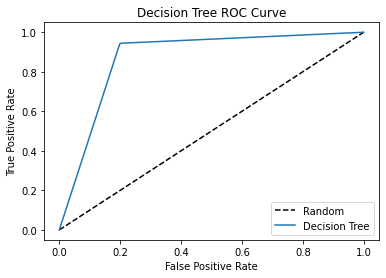

ROC AUC: 0.8724681817452293


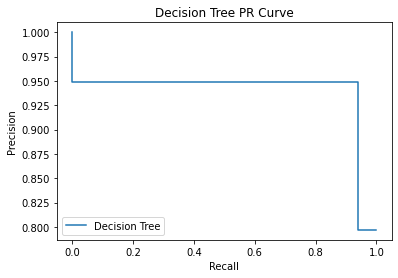

{'mean_fit_time': array([0.0063899]),
 'std_fit_time': array([0.00048923]),
 'mean_score_time': array([0.0007894]),
 'std_score_time': array([0.00039488]),
 'params': [{}],
 'split0_test_score': array([0.92555332]),
 'split1_test_score': array([0.92137097]),
 'split2_test_score': array([0.93951613]),
 'split3_test_score': array([0.92943548]),
 'split4_test_score': array([0.93548387]),
 'split5_test_score': array([0.92741935]),
 'split6_test_score': array([0.91733871]),
 'split7_test_score': array([0.91532258]),
 'split8_test_score': array([0.93548387]),
 'split9_test_score': array([0.93548387]),
 'mean_test_score': array([0.92824082]),
 'std_test_score': array([0.00791691]),
 'rank_test_score': array([1])}

In [23]:
# Instantiate decision tree classifier.
dt = DecisionTreeClassifier(random_state=42)

# Apply CV = 10.
dt_cv = GridSearchCV(dt, {}, cv=10)

# Fit the evaluate the model.
fit_evaluate_model(dt_cv, 'Decision Tree')

# Print the cv results.
dt_cv.cv_results_

### 3.2.2 Support Vector Machine

Training Accuracy:  0.9147349324732916
Test Accuracy:  0.895245769540693
[[144 108]
 [ 22 967]]
              precision    recall  f1-score   support

           0       0.87      0.57      0.69       252
           1       0.90      0.98      0.94       989

    accuracy                           0.90      1241
   macro avg       0.88      0.77      0.81      1241
weighted avg       0.89      0.90      0.89      1241

Specificity:  0.5714285714285714


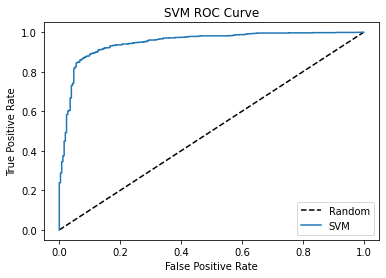

ROC AUC: 0.9474156194328084


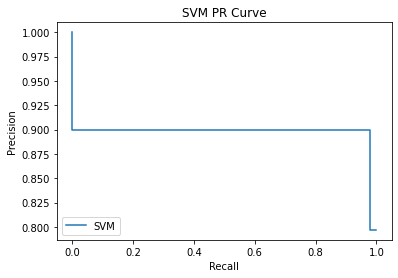

{'mean_fit_time': array([1.16548731]),
 'std_fit_time': array([0.03979021]),
 'mean_score_time': array([0.04378157]),
 'std_score_time': array([0.00232692]),
 'params': [{}],
 'split0_test_score': array([0.88933602]),
 'split1_test_score': array([0.89717742]),
 'split2_test_score': array([0.91935484]),
 'split3_test_score': array([0.9233871]),
 'split4_test_score': array([0.90322581]),
 'split5_test_score': array([0.91935484]),
 'split6_test_score': array([0.91330645]),
 'split7_test_score': array([0.91532258]),
 'split8_test_score': array([0.89314516]),
 'split9_test_score': array([0.91129032]),
 'mean_test_score': array([0.90849005]),
 'std_test_score': array([0.01137437]),
 'rank_test_score': array([1])}

In [24]:
# Create Pipeline:
#    Standardize.
#    Instantiate SVM classifier.
pipeline = Pipeline([('std',StandardScaler()), ('svm',SVC(gamma='auto', probability=True, random_state=42))])

# Apply CV = 10.
svm_cv = GridSearchCV(pipeline, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(svm_cv, 'SVM')

# Print the cv results.
svm_cv.cv_results_

### 3.2.3 Logistic Regression

Training Accuracy:  0.9167506551098569
Test Accuracy:  0.9024979854955681
[[151 101]
 [ 20 969]]
              precision    recall  f1-score   support

           0       0.88      0.60      0.71       252
           1       0.91      0.98      0.94       989

    accuracy                           0.90      1241
   macro avg       0.89      0.79      0.83      1241
weighted avg       0.90      0.90      0.90      1241

Specificity:  0.5992063492063492


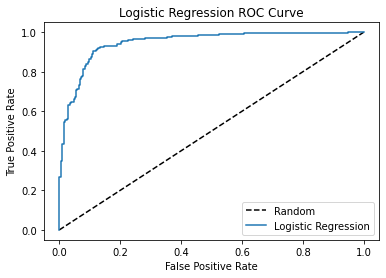

ROC AUC: 0.9472129937246216


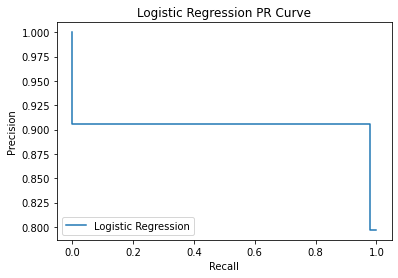

{'mean_fit_time': array([0.01419883]),
 'std_fit_time': array([0.00353201]),
 'mean_score_time': array([0.00109701]),
 'std_score_time': array([0.0002995]),
 'params': [{}],
 'split0_test_score': array([0.89939638]),
 'split1_test_score': array([0.90927419]),
 'split2_test_score': array([0.92943548]),
 'split3_test_score': array([0.93145161]),
 'split4_test_score': array([0.91532258]),
 'split5_test_score': array([0.9233871]),
 'split6_test_score': array([0.91532258]),
 'split7_test_score': array([0.93145161]),
 'split8_test_score': array([0.89919355]),
 'split9_test_score': array([0.91129032]),
 'mean_test_score': array([0.91655254]),
 'std_test_score': array([0.01155857]),
 'rank_test_score': array([1])}

In [25]:
# Instantiate Logistic Regression Classifier.
lr = LogisticRegression(random_state=42)

# Create pipeline: standardize and use classifier.
pipeline = Pipeline([('std',StandardScaler()), ('lr',lr)])

# Apply CV = 10.
lr_cv = GridSearchCV(pipeline, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(lr_cv, 'Logistic Regression')

# Print the CV results.
lr_cv.cv_results_

### 3.2.4 Naive Bayes Classifier

Training Accuracy:  0.8425720620842572
Test Accuracy:  0.8364222401289283
[[132 120]
 [ 83 906]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.57       252
           1       0.88      0.92      0.90       989

    accuracy                           0.84      1241
   macro avg       0.75      0.72      0.73      1241
weighted avg       0.83      0.84      0.83      1241

Specificity:  0.5238095238095238


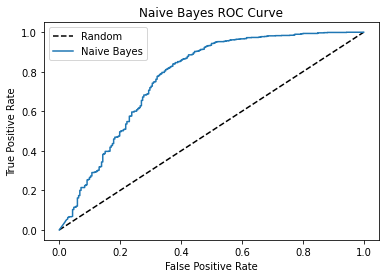

ROC AUC: 0.7713499285794535


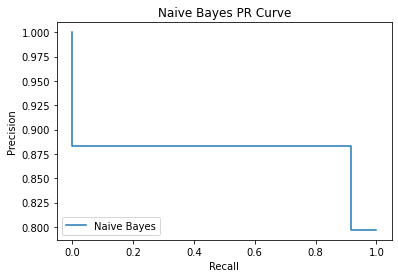

{'mean_fit_time': array([0.00249405]),
 'std_fit_time': array([0.00091892]),
 'mean_score_time': array([0.00099831]),
 'std_score_time': array([0.00044616]),
 'params': [{}],
 'split0_test_score': array([0.83299799]),
 'split1_test_score': array([0.84274194]),
 'split2_test_score': array([0.84274194]),
 'split3_test_score': array([0.83870968]),
 'split4_test_score': array([0.83870968]),
 'split5_test_score': array([0.84879032]),
 'split6_test_score': array([0.84072581]),
 'split7_test_score': array([0.86290323]),
 'split8_test_score': array([0.84879032]),
 'split9_test_score': array([0.83266129]),
 'mean_test_score': array([0.84297722]),
 'std_test_score': array([0.00843941]),
 'rank_test_score': array([1])}

In [26]:
# Instantiate Naive Bayes classifier.
nb = ComplementNB()

# Apply CV = 10.
nb_cv = GridSearchCV(nb, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(nb_cv, "Naive Bayes")

# Print cv results.
nb_cv.cv_results_

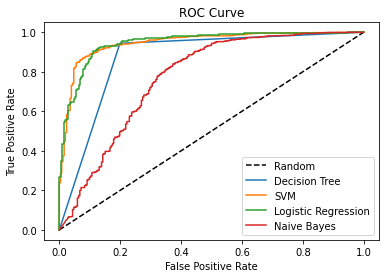

In [27]:
# Plot Base Classifier ROC curves.
plot_all_roc(models,"general_classifier", X_test, y_test)

In [28]:
models.clear()

### Apply Ensemble Methods

We will now apply some Ensemble Methods i. e. Bagging and Boosting.

### 3.3.1 Bagging

We will apply bagging classifier considering each of the Decision Tree, Support Vector Machine, and Logistic Regression at a time as the base estimator. 

### 3.3.1.1 Bagging with Decision Trees

Training Accuracy:  0.9939528320903044
Test Accuracy:  0.9339242546333602
[[207  45]
 [ 37 952]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       252
           1       0.95      0.96      0.96       989

    accuracy                           0.93      1241
   macro avg       0.90      0.89      0.90      1241
weighted avg       0.93      0.93      0.93      1241

Specificity:  0.8214285714285714


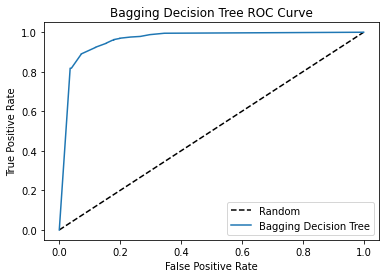

ROC AUC: 0.9606224019773059


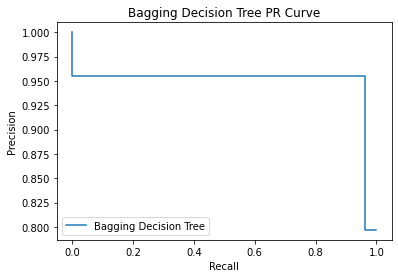

{'mean_fit_time': array([0.04527938]),
 'std_fit_time': array([0.00268427]),
 'mean_score_time': array([0.00289166]),
 'std_score_time': array([0.00121578]),
 'params': [{}],
 'split0_test_score': array([0.94366197]),
 'split1_test_score': array([0.92741935]),
 'split2_test_score': array([0.94153226]),
 'split3_test_score': array([0.93951613]),
 'split4_test_score': array([0.94354839]),
 'split5_test_score': array([0.9375]),
 'split6_test_score': array([0.92741935]),
 'split7_test_score': array([0.93548387]),
 'split8_test_score': array([0.93548387]),
 'split9_test_score': array([0.94758065]),
 'mean_test_score': array([0.93791458]),
 'std_test_score': array([0.00637296]),
 'rank_test_score': array([1])}

In [29]:
# Instantiate Bagging Classifier with Decision Tree.
bc_dt = BaggingClassifier(base_estimator=dt, n_estimators=10, oob_score=False, n_jobs=1, random_state=42)

# Apply CV = 10.
bc_dt_cv = GridSearchCV(bc_dt,{}, cv=10)

# Fit and Evaluate the model.
fit_evaluate_model(bc_dt_cv, 'Bagging Decision Tree')

# Print cv results.
bc_dt_cv.cv_results_

### 3.3.1.2 Bagging with Support Vector Machine

Training Accuracy:  0.9641201370691392
Test Accuracy:  0.8984689766317486
[[178  74]
 [ 52 937]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       252
           1       0.93      0.95      0.94       989

    accuracy                           0.90      1241
   macro avg       0.85      0.83      0.84      1241
weighted avg       0.90      0.90      0.90      1241

Specificity:  0.7063492063492064


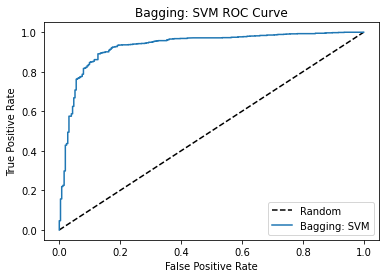

ROC AUC: 0.9301984528223153


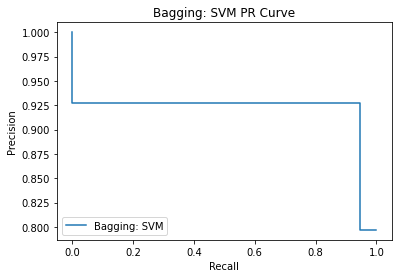

{'mean_fit_time': array([11.31252799]),
 'std_fit_time': array([0.23056774]),
 'mean_score_time': array([0.61804609]),
 'std_score_time': array([0.01322693]),
 'params': [{}],
 'split0_test_score': array([0.88128773]),
 'split1_test_score': array([0.88104839]),
 'split2_test_score': array([0.91532258]),
 'split3_test_score': array([0.88508065]),
 'split4_test_score': array([0.89919355]),
 'split5_test_score': array([0.91330645]),
 'split6_test_score': array([0.89314516]),
 'split7_test_score': array([0.90524194]),
 'split8_test_score': array([0.875]),
 'split9_test_score': array([0.8891129]),
 'mean_test_score': array([0.89377393]),
 'std_test_score': array([0.01332197]),
 'rank_test_score': array([1])}

In [30]:
# Instantiate Bagging Classifier with SVM.
bc_svm = BaggingClassifier(base_estimator=SVC(gamma='auto', probability=True, random_state=42), n_estimators=10, oob_score=False, n_jobs=1, random_state=42)

# Apply CV = 10.
bc_svm_cv = GridSearchCV(bc_svm, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(bc_svm_cv, 'Bagging: SVM')

# Print cv results.
bc_svm_cv.cv_results_

### 3.3.1.3 Bagging  with Logistic Regression

Training Accuracy:  0.9266276960290264
Test Accuracy:  0.911361804995971
[[162  90]
 [ 20 969]]
              precision    recall  f1-score   support

           0       0.89      0.64      0.75       252
           1       0.92      0.98      0.95       989

    accuracy                           0.91      1241
   macro avg       0.90      0.81      0.85      1241
weighted avg       0.91      0.91      0.91      1241

Specificity:  0.6428571428571429


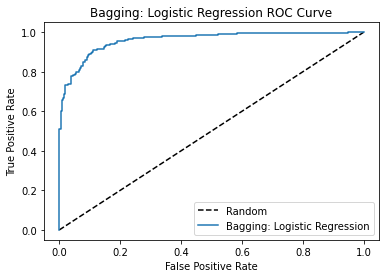

ROC AUC: 0.9603656090005938


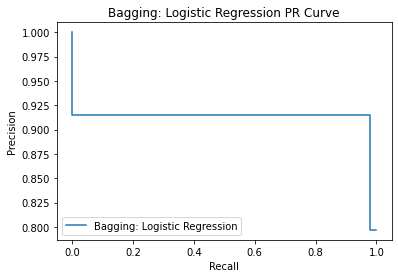

{'mean_fit_time': array([0.46391969]),
 'std_fit_time': array([0.01749811]),
 'mean_score_time': array([0.00199959]),
 'std_score_time': array([1.00353832e-05]),
 'params': [{}],
 'split0_test_score': array([0.91146881]),
 'split1_test_score': array([0.92540323]),
 'split2_test_score': array([0.93548387]),
 'split3_test_score': array([0.94153226]),
 'split4_test_score': array([0.91733871]),
 'split5_test_score': array([0.92540323]),
 'split6_test_score': array([0.92137097]),
 'split7_test_score': array([0.9375]),
 'split8_test_score': array([0.90927419]),
 'split9_test_score': array([0.91733871]),
 'mean_test_score': array([0.9242114]),
 'std_test_score': array([0.01046202]),
 'rank_test_score': array([1])}

In [31]:
# Instantiate Bagging Classifier with Logistic Regression.
bc_lr = BaggingClassifier(base_estimator=lr,n_estimators=10,oob_score=False, random_state=42)

# Apply CV = 10.
bc_lr_cv = GridSearchCV(bc_lr, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(bc_lr_cv, "Bagging: Logistic Regression")

# Print cv results.
bc_lr_cv.cv_results_

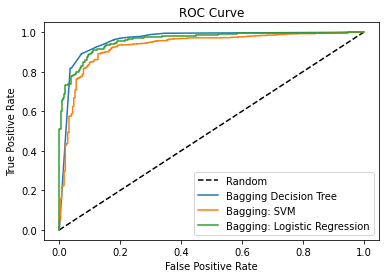

In [32]:
plot_all_roc(models,'bagging_methods', X_test, y_test)

### 3.3.2 Another Ensemble Method: Random Forest

Training Accuracy:  0.9494053618222132
Test Accuracy:  0.9395648670427075
[[199  53]
 [ 22 967]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       252
           1       0.95      0.98      0.96       989

    accuracy                           0.94      1241
   macro avg       0.92      0.88      0.90      1241
weighted avg       0.94      0.94      0.94      1241

Specificity:  0.7896825396825397


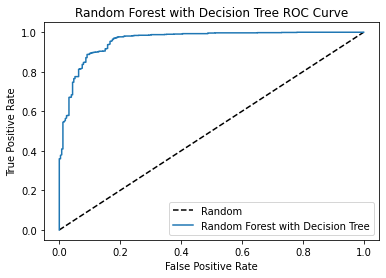

ROC AUC: 0.9585058661145618


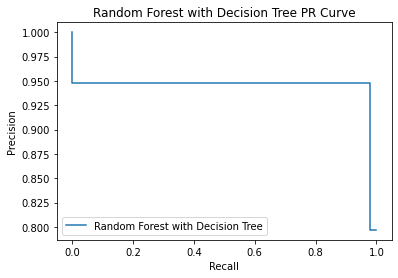

{'mean_fit_time': array([0.157781]),
 'std_fit_time': array([0.01420645]),
 'mean_score_time': array([0.00927322]),
 'std_score_time': array([0.00045882]),
 'params': [{}],
 'split0_test_score': array([0.9416499]),
 'split1_test_score': array([0.94153226]),
 'split2_test_score': array([0.94959677]),
 'split3_test_score': array([0.95362903]),
 'split4_test_score': array([0.94959677]),
 'split5_test_score': array([0.94758065]),
 'split6_test_score': array([0.94959677]),
 'split7_test_score': array([0.95362903]),
 'split8_test_score': array([0.93951613]),
 'split9_test_score': array([0.9516129]),
 'mean_test_score': array([0.94779402]),
 'std_test_score': array([0.00487809]),
 'rank_test_score': array([1])}

In [33]:
#rf = Pipeline([('std', StandardScaler()), ('rf',RandomForestClassifier(max_depth=4, random_state=42))])

# Instantiate the Random Forest Classifier.
rf = RandomForestClassifier(max_depth=4, random_state=42)

# Apply CV = 10.
rf_cv = GridSearchCV(rf, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(rf_cv, 'Random Forest with Decision Tree')

# Print the cv results.
rf_cv.cv_results_

### Important Features

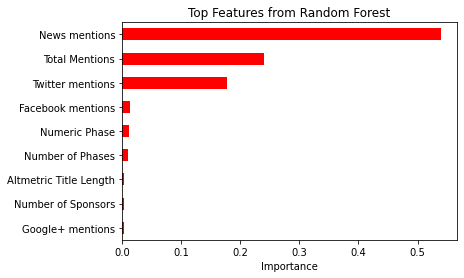

In [34]:
# Get the best estimator from the Random Forest model.
rf = rf_cv.best_estimator_

# Create the Series with the feature importances.
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# Sort the values.
sorted_importances_rf = importances_rf.sort_values()

# Show the plot.
sorted_importances_rf.plot(kind='barh', color='red')
plt.title('Top Features from Random Forest')
plt.xlabel('Importance')
plt.show()

#### Random Forest with GridSearchCV

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Training Accuracy:  0.9592824027413828
Test Accuracy:  0.9395648670427075
[[199  53]
 [ 22 967]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       252
           1       0.95      0.98      0.96       989

    accuracy                           0.94      1241
   macro avg       0.92      0.88      0.90      1241
weighted avg       0.94      0.94      0.94      1241

Specificity:  0.7896825396825397


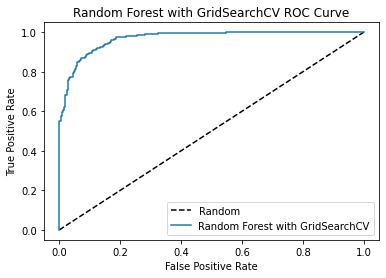

ROC AUC: 0.9686391577190364


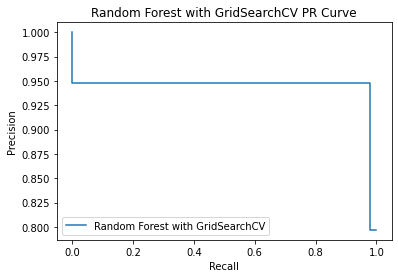

{'mean_fit_time': array([0.24933374, 0.46405857, 0.69254897, 2.32937403, 0.30558324,
       0.5954088 , 0.84863174, 2.39080954, 0.28743005, 0.55920513,
       0.83486803, 2.85656517, 0.35724542, 0.64128585, 0.9592361 ,
       3.3607182 , 0.44311538, 0.77712231, 1.11402168, 3.89020281,
       0.50604722, 0.86289339, 1.23489904, 3.7360142 ]), 'std_fit_time': array([0.01944675, 0.03757223, 0.05580327, 0.21992033, 0.02616035,
       0.07690604, 0.11415896, 0.0663553 , 0.0087269 , 0.0074106 ,
       0.00850313, 0.09004205, 0.04021072, 0.0057809 , 0.00866934,
       0.16204043, 0.09817635, 0.06362165, 0.05119379, 0.26607106,
       0.05894132, 0.04850913, 0.05476792, 0.11652094]), 'mean_score_time': array([0.01685498, 0.03091726, 0.04807124, 0.14590976, 0.02353687,
       0.03610368, 0.04717391, 0.14172299, 0.01695471, 0.03211422,
       0.04787207, 0.14840341, 0.01835053, 0.03321126, 0.04966714,
       0.16047087, 0.02134292, 0.03570437, 0.05206103, 0.17104306,
       0.02652929, 0.0375001 

In [35]:
# Define the parameter grid.
param_grid = {
    'max_depth':[1,2,4,6, 8,10],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the Random Forest classifier.
rf = RandomForestClassifier(random_state=42)

#rf_gridsearch_cv = Pipeline([('std', StandardScaler()), ('rf',GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1,verbose=2))])

# Apply GridSearch with CV = 10.
rf_gridsearch_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1,verbose=2)

# Fit and evaluate the model.
fit_evaluate_model(rf_gridsearch_cv, "Random Forest with GridSearchCV")
#rf_gridsearch_cv['rf'].cv_results_

# Print the cv results.
print(rf_gridsearch_cv.cv_results_)
print(rf_gridsearch_cv.best_params_)

#### Random Forest with RandomSearchCV

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Training Accuracy:  0.9498085063495263
Test Accuracy:  0.9395648670427075
[[199  53]
 [ 22 967]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       252
           1       0.95      0.98      0.96       989

    accuracy                           0.94      1241
   macro avg       0.92      0.88      0.90      1241
weighted avg       0.94      0.94      0.94      1241

Specificity:  0.7896825396825397


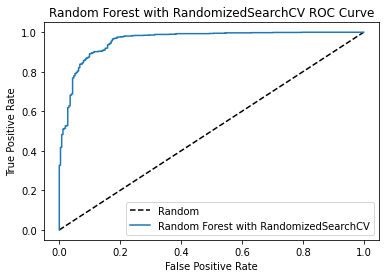

ROC AUC: 0.9587666714815349


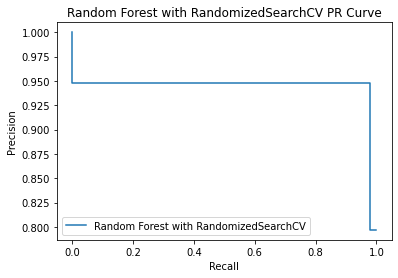

{'mean_fit_time': array([0.33988781, 0.23876269, 0.80614552, 0.99972737, 3.9741787 ,
       2.40636885, 0.42665904, 2.81338198, 0.23487184, 2.93615253]), 'std_fit_time': array([0.00931349, 0.01831469, 0.10687585, 0.08429494, 0.13489551,
       0.06533864, 0.00939618, 0.03103761, 0.00185251, 0.1911591 ]), 'mean_score_time': array([0.01735394, 0.01785221, 0.0362031 , 0.05116386, 0.17952285,
       0.14301696, 0.02982039, 0.15438709, 0.01595724, 0.1150918 ]), 'std_score_time': array([6.61609349e-04, 2.42061715e-03, 3.27942545e-03, 4.39318398e-03,
       1.14590307e-02, 2.56954799e-03, 9.40757133e-04, 9.87095725e-03,
       3.06254210e-07, 2.45649122e-02]), 'param_n_estimators': masked_array(data=[100, 100, 200, 300, 1000, 1000, 200, 1000, 100, 1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 1, 6, 4, 10, 2, 1, 4, 2, 6],
             

In [36]:
# Instantiate the Random Forest classifier.
rf = RandomForestClassifier(random_state=42)

# Apply Randomized Search and CV = 10.
#rf_random_cv = Pipeline([('std', StandardScaler()), ('rf',RandomizedSearchCV(rf, param_grid, cv=10, n_jobs=-1,verbose=2))])
rf_random_cv = RandomizedSearchCV(rf, param_grid, cv=10, n_jobs=-1,verbose=2)

# Fit and evaluate the model.
fit_evaluate_model(rf_random_cv, 'Random Forest with RandomizedSearchCV')

# Print the cv results.
#rf_random_cv['rf'].cv_results_
print(rf_random_cv.cv_results_)
print(rf_random_cv.best_params_)

### 3.3.3 Boosting

We apply Adaboost and Extreme Gradient Boosting (XGBoost) as Boosting Ensemble Methods.

### 3.3.3.1 Adaboost with Decision Tree

Training Accuracy:  0.9979842773634348
Test Accuracy:  0.9218372280419017
[[198  54]
 [ 43 946]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       252
           1       0.95      0.96      0.95       989

    accuracy                           0.92      1241
   macro avg       0.88      0.87      0.88      1241
weighted avg       0.92      0.92      0.92      1241

Specificity:  0.7857142857142857


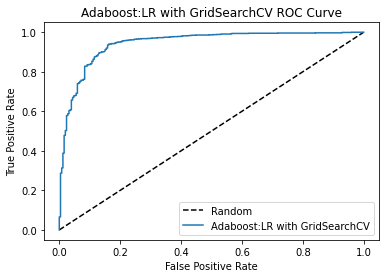

ROC AUC: 0.9434594026353378


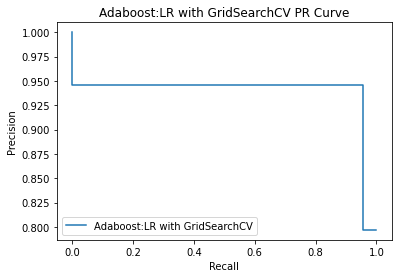

{'mean_fit_time': array([0.66258612]),
 'std_fit_time': array([0.06283981]),
 'mean_score_time': array([0.01679878]),
 'std_score_time': array([0.00071032]),
 'params': [{}],
 'split0_test_score': array([0.95171026]),
 'split1_test_score': array([0.92540323]),
 'split2_test_score': array([0.92943548]),
 'split3_test_score': array([0.94354839]),
 'split4_test_score': array([0.93951613]),
 'split5_test_score': array([0.94758065]),
 'split6_test_score': array([0.92540323]),
 'split7_test_score': array([0.93548387]),
 'split8_test_score': array([0.92741935]),
 'split9_test_score': array([0.93145161]),
 'mean_test_score': array([0.93569522]),
 'std_test_score': array([0.00900885]),
 'rank_test_score': array([1])}

In [37]:
# Instantiate the AdaBoostClassifier using Decision Tree.
ada_dt = AdaBoostClassifier(base_estimator= dt, n_estimators=100, random_state=42)

# Apply CV = 10.
ada_dt_cv = GridSearchCV(ada_dt, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(ada_dt_cv, 'Adaboost:LR with GridSearchCV')

# Print the cv results.
ada_dt_cv.cv_results_

### 3.3.3.2 XGBoost using DMatrix

In [38]:
# Define the DMatrix.
data_dmatrix = xgb.DMatrix(data=X, label=y)

# Set the parameters.
params={'objective':"binary:logistic", "max_depth":4}

# Fit using 10 fold CV and print the error values. 
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10, num_boost_round=10, metrics="error", as_pandas=True)

# Print the training and test accuracies.
print("Training Accuracy: %f" %((1-cv_results['train-error-mean']).iloc[-1]))
print("Test Accuracy: %f" %((1-cv_results['test-error-mean']).iloc[-1]))

Training Accuracy: 0.948171
Test Accuracy: 0.944855


In [39]:
cv_results

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.051847,0.000992,0.054983,0.010217
1,0.052008,0.001039,0.054500,0.010124
2,0.052080,0.000802,0.054177,0.007914
3,0.051937,0.001047,0.054822,0.009015
4,0.051883,0.001117,0.054822,0.009015
5,0.051919,0.001175,0.054500,0.009460
6,0.051865,0.001163,0.054500,0.009460
7,0.051883,0.001065,0.055468,0.009165
8,0.051793,0.001155,0.055306,0.008782
9,0.051829,0.001140,0.055145,0.008747


### 3.3.3.3 XGBoost using Sklearn API type

Training Accuracy:  0.9588792582140697
Test Accuracy:  0.9379532634971797
[[202  50]
 [ 27 962]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       252
           1       0.95      0.97      0.96       989

    accuracy                           0.94      1241
   macro avg       0.92      0.89      0.90      1241
weighted avg       0.94      0.94      0.94      1241

Specificity:  0.8015873015873016


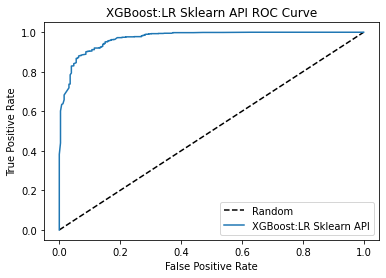

ROC AUC: 0.9704928820196768


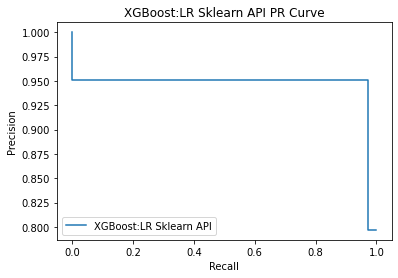

{'mean_fit_time': array([0.0273283]),
 'std_fit_time': array([0.01647322]),
 'mean_score_time': array([0.00388899]),
 'std_score_time': array([0.00113327]),
 'params': [{}],
 'split0_test_score': array([0.94768612]),
 'split1_test_score': array([0.93951613]),
 'split2_test_score': array([0.94758065]),
 'split3_test_score': array([0.9516129]),
 'split4_test_score': array([0.95564516]),
 'split5_test_score': array([0.94153226]),
 'split6_test_score': array([0.94959677]),
 'split7_test_score': array([0.95362903]),
 'split8_test_score': array([0.9233871]),
 'split9_test_score': array([0.94959677]),
 'mean_test_score': array([0.94597829]),
 'std_test_score': array([0.00887294]),
 'rank_test_score': array([1])}

In [40]:
# Instantiate the XGBoost Classifier.
xg_cl = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'error', n_estimators=10, seed=42, use_label_encoder =False)

# Apply cv = 10.
xg_cl_cv = GridSearchCV(xg_cl, {}, cv=10)

# Fit and evaluate the model.
fit_evaluate_model(xg_cl_cv, 'XGBoost:LR Sklearn API' )

# Print the cv results.
xg_cl_cv.cv_results_

#### XGBoost using Sklearn type API and GridSearchCV

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Training Accuracy:  0.947389639185648
Test Accuracy:  0.9395648670427075
[[203  49]
 [ 26 963]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.84       252
           1       0.95      0.97      0.96       989

    accuracy                           0.94      1241
   macro avg       0.92      0.89      0.90      1241
weighted avg       0.94      0.94      0.94      1241

Specificity:  0.8055555555555556


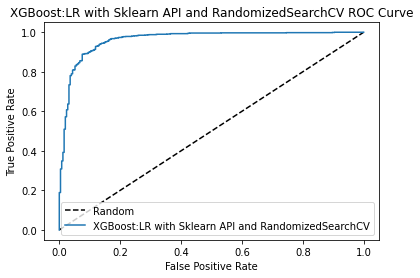

ROC AUC: 0.961972571300175


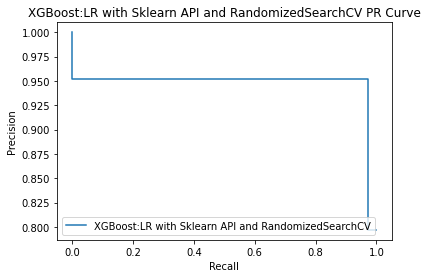

{'mean_fit_time': array([0.19078877]),
 'std_fit_time': array([0.02471497]),
 'mean_score_time': array([0.00418999]),
 'std_score_time': array([0.00040234]),
 'param_learning_rate': masked_array(data=[0.05],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[200],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_subsample': masked_array(data=[0.05],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.05, 'n_estimators': 200, 'subsample': 0.05}],
 'split0_test_score': array([0.93963783]),
 'split1_test_score': array([0.94153226]),
 'split2_test_score': array([0.95766129]),
 'split3_test_score': array([0.9516129]),
 'split4_test_score': array([0.9516129]),
 'split5_test_score': array([0.94758065]),
 'split6_test_score': array([0.94354839]),
 'split7_test_score': array([0.95564516]),
 'split8_test_score': array([0.9254032

In [41]:
# Define the param grid.
gbm_param_grid = {'learning_rate': np.arange(0.05,1.05),
                  'n_estimators': [200],
                  'subsample': np.arange(0.05,1.05)}

# Instantiate the XBoost Classifier.
xg_cl = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'error', seed=42, use_label_encoder =False)

# Apply GridSearch and CV = 10.
xg_cl_gridsearch_cv = GridSearchCV(estimator=xg_cl, param_grid=gbm_param_grid, cv=10, verbose=1)

# Fit and evaluate the model.
fit_evaluate_model(xg_cl_gridsearch_cv, "XGBoost:LR with Sklearn API and RandomizedSearchCV")

# Print the cv results.
xg_cl_gridsearch_cv.cv_results_

#### XGBoost using Sklearn API and RandomizedSearchCV

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Training Accuracy:  0.9697641604515219
Test Accuracy:  0.9363416599516519
[[199  53]
 [ 26 963]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       252
           1       0.95      0.97      0.96       989

    accuracy                           0.94      1241
   macro avg       0.92      0.88      0.90      1241
weighted avg       0.93      0.94      0.93      1241

Specificity:  0.7896825396825397


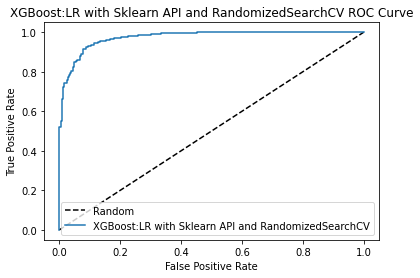

ROC AUC: 0.9734981623252604


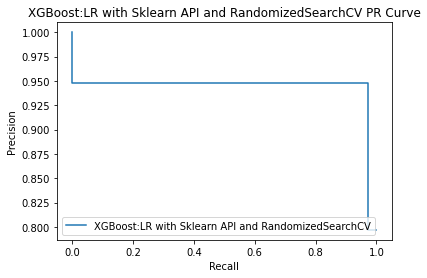

{'mean_fit_time': array([0.26309679, 0.25501835, 0.21352949, 0.26489177, 0.1846065 ,
       0.26638799, 0.18999219, 0.1982713 , 0.21652131, 0.18340964,
       0.15019858, 0.15129561, 0.25292397, 0.26668718, 0.2749651 ,
       0.24584296, 0.26115255, 0.26648765, 0.27257149, 0.26698637,
       0.25830958, 0.15518515, 0.25840936, 0.28124826, 0.2154243 ]), 'std_fit_time': array([0.02261462, 0.01511246, 0.01979373, 0.01917952, 0.00842071,
       0.01475556, 0.0087771 , 0.01443696, 0.0013711 , 0.01143632,
       0.0033733 , 0.00199707, 0.01632827, 0.00101704, 0.01436332,
       0.0019569 , 0.01623221, 0.00188171, 0.0136094 , 0.02254517,
       0.01174999, 0.00190281, 0.01408646, 0.00271301, 0.01095251]), 'mean_score_time': array([0.00428853, 0.00408916, 0.00458786, 0.00438848, 0.00398939,
       0.00428865, 0.00408907, 0.0041889 , 0.00398941, 0.00408926,
       0.00398953, 0.00398936, 0.00418887, 0.00428855, 0.00458772,
       0.00418885, 0.0042886 , 0.00428867, 0.00438824, 0.00448809,
     

In [42]:
# Define the parameter grid.
gbm_param_grid = {'learning_rate': np.arange(0.05,1.05,.05),
                  'n_estimators': [200],
                  'subsample': np.arange(0.05,1.05,.05)}

# Instantiate the XGBoost Classifier.
xg_cl = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'error', seed=42, use_label_encoder =False)

# Apply Randomized Search and CV = 10.
xg_cl_randomsearch_cv = RandomizedSearchCV(estimator=xg_cl, param_distributions=gbm_param_grid,
                                 n_iter=25, cv=10, verbose=1)

# Fit and evaluate the model.
fit_evaluate_model(xg_cl_randomsearch_cv, "XGBoost:LR with Sklearn API and RandomizedSearchCV")

# Print the cv results.
print(xg_cl_randomsearch_cv.cv_results_)
print(xg_cl_randomsearch_cv.best_params_)

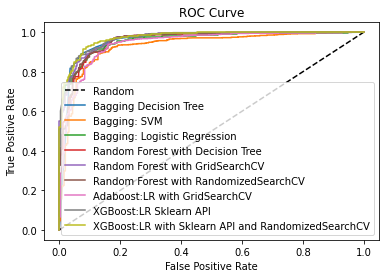

In [43]:
# Plot Ensemble Method ROC Curves.
plot_all_roc(models, 'ensemble_methods', X_test, y_test)